In [34]:
import qrcode
import os
from PIL import Image

In [32]:
# Input data
data = "https://amertatstudio.com"

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)
qr.add_data(data)
qr.make(fit=True)

# Generate QR code image
qr_img = qr.make_image(fill_color="black", back_color="white").convert("RGB")

# Add logo
logo = Image.open("/Users/amertatstudio/Desktop/ML Project/AMERTAT.jpg")  

# Ensure the logo is in RGBA format
logo = logo.convert("RGBA")

# Resize logo
logo_size = 120

logo = logo.resize((logo_size, logo_size))


mask = Image.new("RGBA", logo.size, (255, 255, 255, 0))  
mask.paste(logo, (0, 0), logo)

# Paste logo onto the QR Code
logo_position = ((qr_img.size[0] - logo_size) // 2, (qr_img.size[1] - logo_size) // 2)
qr_img.paste(logo, logo_position, mask=logo)

In [35]:
output_folder = "G/Users/amertatstudio/Desktop/ML Project/"  
os.makedirs(output_folder, exist_ok=True) 
output_path = os.path.join(output_folder, "creative_qr_code.png")
qr_img.save(output_path)

print(f"QR Code saved to {output_path}")

QR Code saved to G/Users/amertatstudio/Desktop/ML Project/creative_qr_code.png


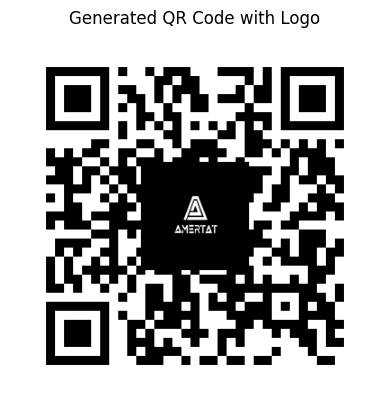

In [36]:
import matplotlib.pyplot as plt

# Display the QR Code
plt.imshow(qr_img)
plt.axis('off')  # Hide axes
plt.title("Generated QR Code with Logo")
plt.show()
